In [2]:
# !pip install torch torchvision


Mengimport library PyTorch dan torchvision :


1.   torch: untuk operasi tensor dan algoritma pembelajaran mendalam.
torch.nn: untuk membangun model neural network.
2.  torch.optim: untuk fungsi optimasi model.
3.  torchvision: untuk manipulasi dataset dan model yang sudah dilatih sebelumnya.
4.  matplotlib.pyplot: untuk visualisasi data dan grafik pelatihan.





In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt

Penentuan Perangkat (CPU/GPU)

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#MNIST

Mengunduh dataset MNIST dari torchvision dan menerapkan transformasi yang didefinisikan sebelumnya.

Menggunakan transforms.Compose dari torchvision untuk menerapkan transformasi pada dataset.

Transformasi yang digunakan:
transforms.ToTensor():
* Mengubah gambar dari format PIL (Python
Imaging Library) atau NumPy array menjadi tensor PyTorch.
* transforms.Normalize((0.5,), (0.5,)): Menormalkan gambar dengan nilai rata-rata 0,5 dan standar deviasi 0,5. Penormalan ini membantu mempercepat proses pelatihan dengan menyelaraskan nilai piksel dalam rentang tertentu.

trainloader dan testloader: Memuat dataset ke dalam DataLoader untuk mempermudah pengelolaan data selama pelatihan dan pengujian.

In [5]:
# Transformasi data MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Dataset MNIST
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 38226637.32it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1080632.79it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2285352.10it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5998277.32it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Definisi SimpleCNN untuk MNIST:
* conv1 dan conv2: Lapisan konvolusi dengan filter ukuran 3x3. conv1 menerima satu saluran (karena MNIST adalah gambar grayscale), dan menghasilkan 32 filter. conv2 menghasilkan 64 filter.
* pool: Lapisan max pooling dengan ukuran kernel 2x2, yang mengecilkan dimensi fitur.
* fc1 dan fc2: Lapisan fully connected (FC). FC pertama menerima vektor berukuran 64*7*7 yang diubah menjadi 128 unit, dan FC terakhir memetakan ke 10 kelas (sesuai jumlah kelas pada dataset MNIST).
* forward: Fungsi forward pass untuk melintasi data melalui jaringan. Data diteruskan melalui lapisan konvolusi, pooling, lapisan fully connected, dan akhirnya menghasilkan output prediksi.





In [6]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [7]:
# Inisialisasi model, loss, and optimizer
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Fungsi Training Model

In [8]:
def train_model(model, trainloader, criterion, optimizer, epochs=5):
    model.train()
    train_loss = []
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        epoch_loss = running_loss / len(trainloader)
        train_loss.append(epoch_loss)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")
    return train_loss

Training pada model

In [9]:
train_loss_mnist = train_model(model, trainloader, criterion, optimizer)

Epoch 1/5, Loss: 0.1691
Epoch 2/5, Loss: 0.0474
Epoch 3/5, Loss: 0.0345
Epoch 4/5, Loss: 0.0244
Epoch 5/5, Loss: 0.0186


Visualisasi Training Loss

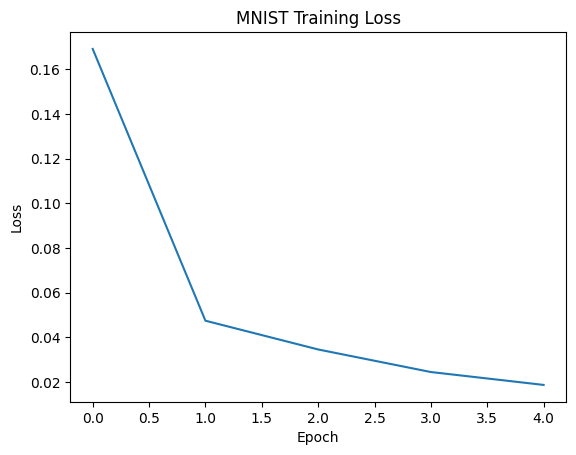

In [10]:
plt.plot(train_loss_mnist)
plt.title('MNIST Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#CIFAR

Model Alexnet

Transformasi data CIFAR-10 (resize gambar menjadi 224x224)

In [11]:
transform_cifar = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(224, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


Mengimport dataset CIFAR-10

In [12]:
trainset_cifar = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_cifar)
trainloader_cifar = torch.utils.data.DataLoader(trainset_cifar, batch_size=64, shuffle=True)

testset_cifar = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_cifar)
testloader_cifar = torch.utils.data.DataLoader(testset_cifar, batch_size=64, shuffle=False)


100%|██████████| 170498071/170498071 [00:01<00:00, 103203522.99it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Inisialisasi model AlexNet

In [13]:
model_cifar = models.alexnet(pretrained=False, num_classes=10)
model_cifar = model_cifar.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Inisialisasi Model Loss dan Optimizer

In [14]:
criterion_cifar = nn.CrossEntropyLoss()
optimizer_cifar = optim.Adam(model_cifar.parameters(), lr=0.001)

Fungsi training dataset CIFAR dengan model Alexnet

In [15]:
def train_model_cifar(model, trainloader, criterion, optimizer, epochs=5):
    model.train()
    train_loss = []
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        epoch_loss = running_loss / len(trainloader)
        train_loss.append(epoch_loss)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")
    return train_loss

Training model dataset CIFAR-10 untuk model Alexnet

In [16]:
# Training the model on CIFAR-10
train_loss_cifar = train_model_cifar(model_cifar, trainloader_cifar, criterion_cifar, optimizer_cifar)

Epoch 1/5, Loss: 1.7303
Epoch 2/5, Loss: 1.4193
Epoch 3/5, Loss: 1.2922
Epoch 4/5, Loss: 1.2081
Epoch 5/5, Loss: 1.1544


Visualisasi plot training loss untuk dataset CIFAR-10 pada model Alexnet

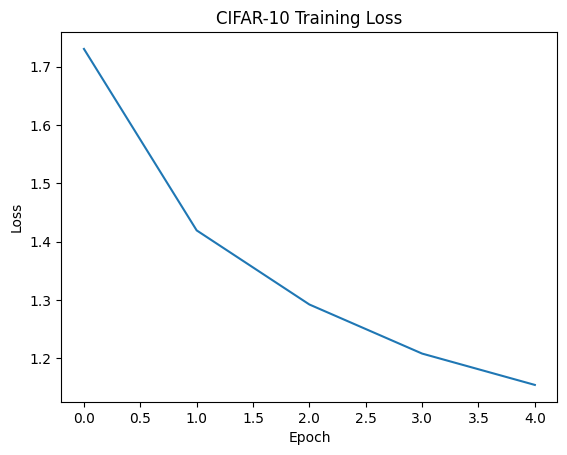

In [17]:
# Plotting CIFAR-10 Training Loss
plt.plot(train_loss_cifar)
plt.title('CIFAR-10 Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Model Resnet-18

Transformasi data CIFAR-10

In [18]:
from torchvision.models import resnet18

transform_cifar = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

Import data CIFAR-10

In [19]:
trainset_cifar = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_cifar)
trainloader_cifar = torch.utils.data.DataLoader(trainset_cifar, batch_size=64, shuffle=True)

testset_cifar = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_cifar)
testloader_cifar = torch.utils.data.DataLoader(testset_cifar, batch_size=64, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


Import model ResNet-18

In [20]:
model_cifar = resnet18(pretrained=False)
model_cifar.fc = nn.Linear(model_cifar.fc.in_features, 10)  
model_cifar = model_cifar.to(device)

Inisialisasi Model Loss dan Optimizer

In [21]:
criterion_cifar = nn.CrossEntropyLoss()
optimizer_cifar = optim.Adam(model_cifar.parameters(), lr=0.001)

Fungsi Training Model Resnet-18 pada dataset CIFAR-10

In [22]:
def train_model_cifar(model, trainloader, criterion, optimizer, epochs=5):
    model.train()
    train_loss = []
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        epoch_loss = running_loss / len(trainloader)
        train_loss.append(epoch_loss)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")
    return train_loss

Training model Resnet-18 Pada Dataset CIFAR-10

In [23]:
train_loss_cifar = train_model_cifar(model_cifar, trainloader_cifar, criterion_cifar, optimizer_cifar)


Epoch 1/5, Loss: 1.5605
Epoch 2/5, Loss: 1.2054
Epoch 3/5, Loss: 1.0286
Epoch 4/5, Loss: 0.9273
Epoch 5/5, Loss: 0.8463


Visualisasi plot training loss untuk dataset CIFAR-10 pada model Alexnet

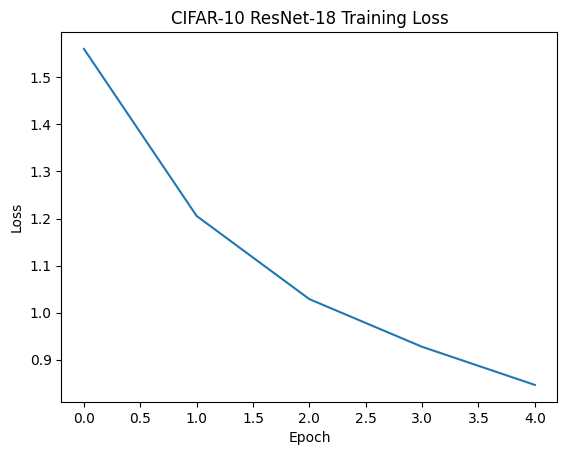

In [24]:
plt.plot(train_loss_cifar)
plt.title('CIFAR-10 ResNet-18 Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Fungsi untuk menghitung akurasi dan mengevaluasi model

In [35]:
def evaluate_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Accuracy dari model : {accuracy:.2f}%")
    return accuracy

# Evaluasi akurasi SimpleCNN pada MNIST
evaluate_model(model, testloader)
# Evaluasi akurasi SimpleCNN pada MNIST ResNet-18
evaluate_model(model_cifar, testloader_cifar)

Accuracy dari model : 98.97%
Accuracy dari model : 68.18%


68.18